In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

In [2]:
#load input data
input_file= "data.txt"
data = np.loadtxt(input_file, delimiter=",")
X, Y = data[:, :-1], data[:, -1].astype(np.int)

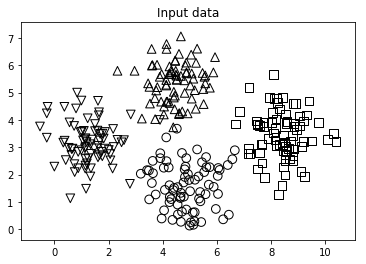

In [3]:
#data visualization
plt.figure()
plt.title("Input data")
marker_shapes = "v^os" 
mapper = [marker_shapes[i] for i in Y] #Y label 값에 따라 marker 모양 설정
for i in range(X.shape[0]) : #X.shape[0] 행 개수
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=75, edgecolors="black", facecolors="none")
plt.show()

In [4]:
#grid width for visualization
step_size = 0.01

In [5]:
#k-nn classifier
num_neighbors = 5
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

#fitting classifier
classifier.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [6]:
# draw boundaries using mesh grid
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1 #X축, 즉 X[:, 0]
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1 #Y축, 즉 X[:, 1]
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
#np.meshgrid : 주어진 벡터에 따른 공간 세팅

In [7]:
#predict all the points on grid
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
#npobject.ravel() : 주어진 배열을 flatten하는 메소드. 이 경우 2차원 배열을 1차원 배열로 이어붙였다.

In [8]:
x_values

array([[ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       ..., 
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38]])

In [9]:
x_values.ravel()

array([ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38])

In [10]:
print(x_values.shape) #893*1292
print(x_values.ravel().shape) #1153756 == 893*1292

(893, 1292)
(1153756,)


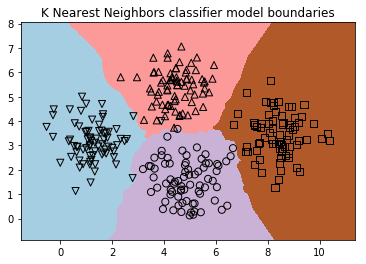

In [11]:
#output visualization
output = output.reshape(x_values.shape) #1차원 배열을 다시 본래 형태의 2차원 배열로 되돌림, 1153756 -> 893*1292
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

for i in range(X.shape[0]) : 
    plt.scatter(X[i,0], X[i,1], marker=mapper[i], s=50, edgecolors="black", facecolors="none")
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title("K Nearest Neighbors classifier model boundaries")

plt.show()

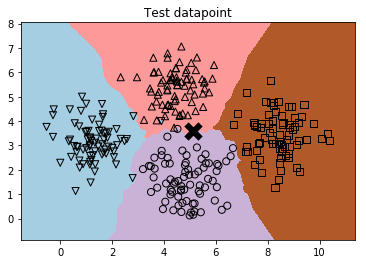

In [12]:
#add test data point
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title("Test datapoint")
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

for i in range(X.shape[0]) : 
    plt.scatter(X[i,0], X[i,1], marker=mapper[i], s=50, edgecolors="black", facecolors="none")

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())

plt.scatter(test_datapoint[0], test_datapoint[1], marker="x", linewidth=6, s=200, facecolors="black")
plt.show()

In [13]:
#extracting k-nn
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

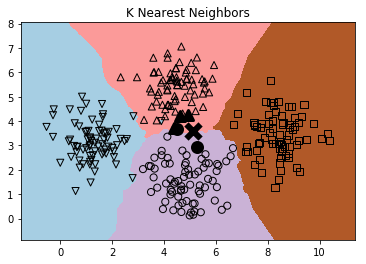

In [14]:
#visualize k-nn
plt.figure()
plt.title("K Nearest Neighbors")
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

#k-nn points
for i in indices : 
    plt.scatter(X[i,0], X[i,1], marker=mapper[i], linewidth=3, s=100, facecolors="black")

#test datapoint
plt.scatter(test_datapoint[0], test_datapoint[1], marker="x", linewidth=6, s=200, facecolors="black")

#input datapoints
for i in range(X.shape[0]) : 
    plt.scatter(X[i,0], X[i,1], marker=mapper[i], s=50, edgecolors="black", facecolors="none")

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())

plt.show()

In [15]:
print("Predicted output:", classifier.predict([test_datapoint])[0])

Predicted output: 1
